<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250506%5D%20Trust%20FL%20MLP-LSTM_logged_extended%20on%20WSN-DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# trust_federated_mlp_lstm_logged_extended.py

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, InputLayer
from keras.regularizers import l2
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import cosine

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")  # WSN-DS 5-class dataset
dataset = dataset.dropna()  # Remove missing values

In [3]:
dataset

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Class
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,0
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,0
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,0
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,0


In [4]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [340066  14596  10049   6638   3312]


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [340066 340066 340066 340066 340066]


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [8]:
pip install matplotlib

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step
Round 1
Accuracy: 0.77230890, Precision: 0.80261400, Recall: 0.77230890, F1-Score: 0.74844887
Confusion Matrix:
[[67441   383     3    95    91]
 [ 9766 57604   154   489     0]
 [ 8624 42678 16142   569     0]
 [ 8832   232  5090 53860     0]
 [  147   277     0     0 67589]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step
Round 2
Accuracy: 0.90578594, Precision: 0.92812148, Recall: 0.90578594, F1-Score: 0.90256705
Confusion Matrix:
[[67599   258     1    72    83]
 [   15 41047 26949     2     0]
 [    0     0 67977    36     0]
 [ 4317   211    42 63444     0]
 [   52     1     0     0 67960]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step
Round 3
Accuracy: 0.90573595, Precision: 0.92819558, Recall: 0.90573595, F1-Score: 0.90250930
Confusion Matrix:
[[67683   220     2    30    78]
 [   12 41060 26932     9     0]
 [    0     0 67979    34     0]
 [ 4474   198    31 63311     0]
 [   35     1     0     0 67977]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step
Round 4
Accuracy: 0.90631524, Precision: 0.92912420, Recall: 0.90631524, F1-Score: 0.90306086
Confusion Matrix:
[[67737   138     1    58    79]
 [   45 41029 26931     8     0]
 [    0     0 67976    37     0]
 [ 4412    90    39 63473     0]
 [   21     0     0     0 67992]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step
Round 5
Accuracy: 0.90585063, Precision: 0.92859731, Recall: 0.90585063, F1-Score: 0.90259140
Confusion Matrix:
[[67775   136    10    16    76]
 [   63 41011 26939     0     0]
 [    0     0 68000    13     0]
 [ 4497   184    45 63288     0]
 [   38     0     0     0 67975]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step
Round 6
Accuracy: 0.90619762, Precision: 0.92911157, Recall: 0.90619762, F1-Score: 0.90294303
Confusion Matrix:
[[67761   137     0    36    79]
 [   51 41023 26939     0     0]
 [    0     0 68010     3     0]
 [ 4503    85    51 63375     0]
 [   14     1     0     0 67998]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step
Round 7
Accuracy: 0.90632995, Precision: 0.92905145, Recall: 0.90632995, F1-Score: 0.90309359
Confusion Matrix:
[[67760   140     0    35    78]
 [   22 41052 26939     0     0]
 [    0     0 68005     8     0]
 [ 4416   152    37 63409     0]
 [   25     2     0     0 67986]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step
Round 8
Accuracy: 0.90590356, Precision: 0.92862834, Recall: 0.90590356, F1-Score: 0.90268393
Confusion Matrix:
[[67766   151    13     6    77]
 [    8 41066 26939     0     0]
 [    0     0 68010     3     0]
 [ 4550   184    37 63243     0]
 [   26     0     5     0 67982]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step
Round 9
Accuracy: 0.90578888, Precision: 0.92847295, Recall: 0.90578888, F1-Score: 0.90256389
Confusion Matrix:
[[67771   158     5     3    76]
 [   16 41058 26939     0     0]
 [    0     0 68013     0     0]
 [ 4559   199    52 63204     0]
 [   23     7     1     0 67982]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
Round 10
Accuracy: 0.90649168, Precision: 0.92926201, Recall: 0.90649168, F1-Score: 0.90323891
Confusion Matrix:
[[67787   119     1    30    76]
 [   18 41048 26930    17     0]
 [    0     0 68007     6     0]
 [ 4434   128    17 63435     0]
 [   20     3     0     0 67990]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
Round 11
Accuracy: 0.90680633, Precision: 0.92960476, Recall: 0.90680633, F1-Score: 0.90355165
Confusion Matrix:
[[67759   119     5    54    76]
 [   40 41033 26938     2     0]
 [    0     0 68012     1     0]
 [ 4307   108    23 63576     0]
 [   18     1     0     0 67994]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step
Round 12
Accuracy: 0.90603295, Precision: 0.92867557, Recall: 0.90603295, F1-Score: 0.90279918
Confusion Matrix:
[[67785   148     0     4    76]
 [   13 41062 26938     0     0]
 [    0     1 68012     0     0]
 [ 4524   196    28 63266     0]
 [   17    10     0     0 67986]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step
Round 13
Accuracy: 0.90579476, Precision: 0.92860352, Recall: 0.90579476, F1-Score: 0.90256486
Confusion Matrix:
[[67805   125     5     2    76]
 [    9 41065 26939     0     0]
 [    0     0 68013     0     0]
 [ 4646   173    38 63157     0]
 [   18     5     0     0 67990]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step
Round 14
Accuracy: 0.90625055, Precision: 0.92894794, Recall: 0.90625055, F1-Score: 0.90302059
Confusion Matrix:
[[67760   157     1    18    77]
 [   10 41064 26939     0     0]
 [    0     0 68013     0     0]
 [ 4476   150    28 63360     0]
 [   18     7     0     0 67988]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step
Round 15
Accuracy: 0.90596237, Precision: 0.92849943, Recall: 0.90596237, F1-Score: 0.90275088
Confusion Matrix:
[[67686   228     9    14    76]
 [    6 41068 26939     0     0]
 [    0     0 68013     0     0]
 [ 4474   160    42 63338     0]
 [   10    21     0     0 67982]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step
Round 16
Accuracy: 0.90607706, Precision: 0.92890061, Recall: 0.90607706, F1-Score: 0.90284890
Confusion Matrix:
[[67787   139     5     6    76]
 [   10 41065 26938     0     0]
 [    0     0 68013     0     0]
 [ 4576   127    34 63277     0]
 [   19    10     0     0 67984]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step
Round 17
Accuracy: 0.90583299, Precision: 0.92849751, Recall: 0.90583299, F1-Score: 0.90261788
Confusion Matrix:
[[67758   148    29     2    76]
 [    3 41071 26939     0     0]
 [    0     0 68013     0     0]
 [ 4569   203    19 63223     0]
 [   12    17     6     0 67978]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step
Round 18
Accuracy: 0.90603589, Precision: 0.92869005, Recall: 0.90603589, F1-Score: 0.90280004
Confusion Matrix:
[[67805   130     0     2    76]
 [   12 41063 26938     0     0]
 [    0     0 68013     0     0]
 [ 4528   215    26 63245     0]
 [   21     6     0     0 67986]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step
Round 19
Accuracy: 0.90603295, Precision: 0.92874479, Recall: 0.90603295, F1-Score: 0.90281968
Confusion Matrix:
[[67774   150    10     3    76]
 [    6 41068 26939     0     0]
 [    0     0 68013     0     0]
 [ 4514   174    39 63287     0]
 [   10    18    16     0 67969]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step
Round 20
Accuracy: 0.90611234, Precision: 0.92889862, Recall: 0.90611234, F1-Score: 0.90288543
Confusion Matrix:
[[67805   124     5     3    76]
 [   10 41064 26939     0     0]
 [    0     0 68013     0     0]
 [ 4536   160    41 63277     0]
 [   21    13     0     0 67979]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step
Round 21
Accuracy: 0.90575065, Precision: 0.92828573, Recall: 0.90575065, F1-Score: 0.90252678
Confusion Matrix:
[[67754   180     1     2    76]
 [    3 41072 26938     0     0]
 [    0     0 68013     0     0]
 [ 4570   230    31 63183     0]
 [   10    10     0     0 67993]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step
Round 22
Accuracy: 0.90498609, Precision: 0.92773818, Recall: 0.90498609, F1-Score: 0.90175311
Confusion Matrix:
[[67790   136    11     0    76]
 [    9 41059 26945     0     0]
 [    0     0 68013     0     0]
 [ 4847   223    34 62910     0]
 [   12    18     0     0 67983]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step
Round 23
Accuracy: 0.90610058, Precision: 0.92879360, Recall: 0.90610058, F1-Score: 0.90287614
Confusion Matrix:
[[67779   142    12     2    78]
 [    3 41070 26940     0     0]
 [    0     0 68013     0     0]
 [ 4523   193    27 63271     0]
 [   12     0     0     0 68001]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step
Round 24
Accuracy: 0.90570360, Precision: 0.92852259, Recall: 0.90570360, F1-Score: 0.90250047
Confusion Matrix:
[[67761   140    34     2    76]
 [    8 41063 26942     0     0]
 [    0     0 68013     0     0]
 [ 4597   190    36 63191     0]
 [   10     0    32     0 67971]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step
Round 25
Accuracy: 0.90553892, Precision: 0.92873028, Recall: 0.90553892, F1-Score: 0.90230847
Confusion Matrix:
[[67814   113    10     0    76]
 [   14 41059 26940     0     0]
 [    0     0 68013     0     0]
 [ 4862    38    47 63067     0]
 [   19     4     0     0 67990]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step
Round 26
Accuracy: 0.90739151, Precision: 0.92946553, Recall: 0.90739151, F1-Score: 0.90439267
Confusion Matrix:
[[67756   158    21     2    76]
 [    5 41638 26370     0     0]
 [    0     0 68013     0     0]
 [ 4634   118    74 63188     0]
 [    8    27     0     0 67978]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step
Round 27
Accuracy: 0.92318550, Precision: 0.93809263, Recall: 0.92318550, F1-Score: 0.92164941
Confusion Matrix:
[[67761   164     9     3    76]
 [    5 46946 21062     0     0]
 [    0     2 68011     0     0]
 [ 4527   242     2 63243     0]
 [   14    16     0     0 67983]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 61s 6ms/step
Round 28
Accuracy: 0.92250034, Precision: 0.93776620, Recall: 0.92250034, F1-Score: 0.92091386
Confusion Matrix:
[[67746   179    10     2    76]
 [    6 46701 21306     0     0]
 [    0     0 68013     0     0]
 [ 4561   183     6 63264     0]
 [    6    20     0     0 67987]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step
Round 29
Accuracy: 0.93277481, Precision: 0.94356360, Recall: 0.93277481, F1-Score: 0.93187964
Confusion Matrix:
[[67749   177     9     2    76]
 [    2 50386 17625     0     0]
 [    0   154 67859     0     0]
 [ 4501   274    12 63227     0]
 [   14    15     0     0 67984]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step
Round 30
Accuracy: 0.93184852, Precision: 0.94339681, Recall: 0.93184852, F1-Score: 0.93087354
Confusion Matrix:
[[67648   258    13    18    76]
 [    1 49848 18164     0     0]
 [    0     0 68013     0     0]
 [ 4419   179    22 63394     0]
 [    2    24     0     0 67987]]



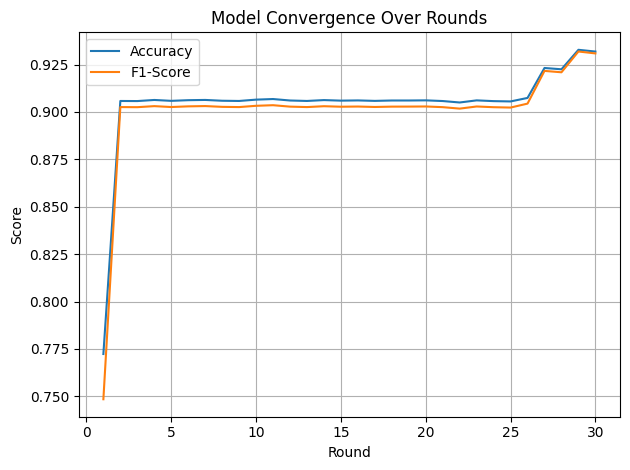

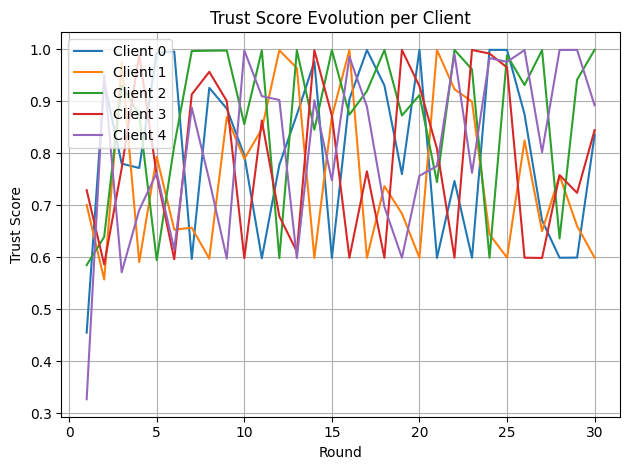

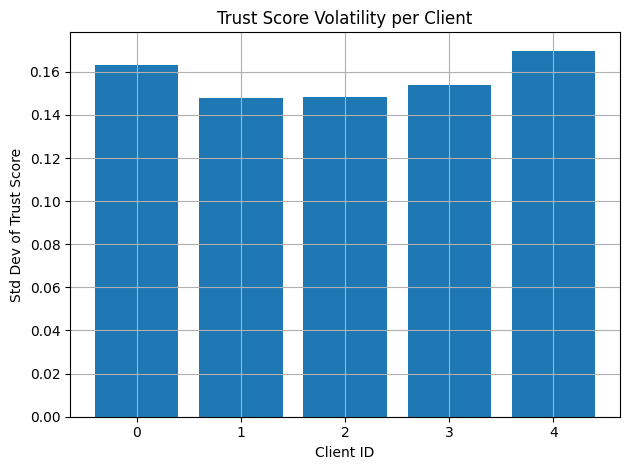

In [10]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train_cat.shape[1]

def build_hybrid_model(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def compute_cosine_similarity(update1, update2):
    flat1 = np.concatenate([w.flatten() for w in update1])
    flat2 = np.concatenate([w.flatten() for w in update2])
    return 1 - cosine(flat1, flat2)

def compute_stability(client_updates, history):
    if len(history) < 2:
        return 1.0
    sims = [compute_cosine_similarity(client_updates, past) for past in history[-3:]]
    return np.mean(sims)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val + 1e-8)

def compute_trust_scores(client_updates_dict, global_weights, val_losses_dict, update_history_dict, alpha=(0.4, 0.4, 0.2)):
    scores = {}
    all_val_losses = list(val_losses_dict.values())
    min_loss, max_loss = min(all_val_losses), max(all_val_losses)

    for client_id, local_update in client_updates_dict.items():
        sim = compute_cosine_similarity(local_update, global_weights)
        val_loss = val_losses_dict[client_id]
        stability = compute_stability(local_update, update_history_dict.get(client_id, []))
        norm_val_loss = normalize(val_loss, min_loss, max_loss)
        trust = (alpha[0] * sim) + (alpha[1] * (1 - norm_val_loss)) + (alpha[2] * stability)
        scores[client_id] = trust
    return scores

def trust_weighted_aggregation(client_weights, trust_scores):
    total_trust = sum(trust_scores.values())
    new_global = [
        sum(trust_scores[cid] * np.array(client_weights[cid][i]) for cid in client_weights) / total_trust
        for i in range(len(next(iter(client_weights.values()))))
    ]
    return new_global

def evaluate_global_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    return accuracy, precision, recall, f1, cm

# Trust and metric logs
trust_log = []
round_metrics = []
communication_cost_log = []

def federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat, num_clients=5, rounds=30):
    client_data = np.array_split(X_train, num_clients)
    client_labels = np.array_split(y_train_cat, num_clients)

    global_model = build_hybrid_model(input_shape, num_classes)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    global_weights = global_model.get_weights()

    update_history = {i: [] for i in range(num_clients)}

    for round in range(rounds):
        client_updates = {}
        val_losses = {}
        round_cost = 0

        for i in range(num_clients):
            local_model = build_hybrid_model(input_shape, num_classes)
            local_model.set_weights(global_weights)
            local_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            local_model.fit(client_data[i], client_labels[i], epochs=1, batch_size=32, verbose=0)

            local_weights = local_model.get_weights()
            loss, _ = local_model.evaluate(X_test, y_test_cat, verbose=0)

            client_updates[i] = local_weights
            val_losses[i] = loss
            update_history[i].append(local_weights)

            # Compute communication cost per client
            round_cost += sum(w.nbytes for w in local_weights)

        trust_scores = compute_trust_scores(client_updates, global_weights, val_losses, update_history)

        for client_id, score in trust_scores.items():
            trust_log.append({
                'round': round + 1,
                'client_id': client_id,
                'trust_score': score
            })

        global_weights = trust_weighted_aggregation(client_updates, trust_scores)
        global_model.set_weights(global_weights)

        accuracy, precision, recall, f1, cm = evaluate_global_model(global_model, X_test, y_test_cat)
        print(f"Round {round + 1}")
        #print(f"Accuracy: {accuracy:.8f}, F1-Score: {f1:.8f}")
        print(f"Accuracy: {accuracy:.8f}, Precision: {precision:.8f}, Recall: {recall:.8f}, F1-Score: {f1:.8f}")
        print(f"Confusion Matrix:\n{cm}\n")

        round_metrics.append({'round': round + 1, 'accuracy': accuracy, 'f1': f1})
        communication_cost_log.append({'round': round + 1, 'comm_cost_MB': round_cost / (1024**2)})

    # Save logs
    pd.DataFrame(trust_log).to_csv("trust_scores_log.csv", index=False)
    pd.DataFrame(round_metrics).to_csv("round_metrics_log.csv", index=False)
    pd.DataFrame(communication_cost_log).to_csv("communication_cost_log.csv", index=False)

    # Plot accuracy and F1-score
    metric_df = pd.DataFrame(round_metrics)
    plt.plot(metric_df['round'], metric_df['accuracy'], label='Accuracy')
    plt.plot(metric_df['round'], metric_df['f1'], label='F1-Score')
    plt.title("Model Convergence Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score trends
    trust_df = pd.DataFrame(trust_log)
    for client_id in trust_df['client_id'].unique():
        client_data = trust_df[trust_df['client_id'] == client_id]
        plt.plot(client_data['round'], client_data['trust_score'], label=f'Client {client_id}')
    plt.xlabel("Round")
    plt.ylabel("Trust Score")
    plt.title("Trust Score Evolution per Client")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score volatility (standard deviation over rounds)
    volatility = trust_df.groupby('client_id')['trust_score'].std().reset_index()
    plt.bar(volatility['client_id'], volatility['trust_score'])
    plt.title("Trust Score Volatility per Client")
    plt.xlabel("Client ID")
    plt.ylabel("Std Dev of Trust Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Execute
federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat)